<a href="https://colab.research.google.com/github/pancakexia/machinelearning/blob/main/ex2_multivariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
### load data
# call the load_dat function to load X and Y from the corresponding input files
X = load_dat("ex2x.dat")
Y =  load_dat("ex2y.dat")
# get some statistics of the data
num_samples = X.shape[0] # get the first dimension of X (i.e. number of rows)
dim = X.shape[1] # get the second dimension of X (i.e. number of columns)
print('X (%d x %d)' %(num_samples, dim))
print('Y (%d)' %(num_samples))

X (47 x 2)
Y (47)


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np # import numpy for matrix operations
### this function load data from .dat file
def load_dat(filename):
    with open(filename, 'r') as fin:
        lines = fin.readlines()
        dim = len(lines[0].strip().split())
        num_samples = len(lines)
        data = np.zeros((num_samples, dim))
        for i in range(num_samples):
            data[i, :] = np.array([float(x) for x in lines[i].strip().split()])
        return data

In [14]:
### add intercept term to all samples in X
X = np.concatenate((np.ones((num_samples, 1)), X), axis=1)### Your code here ###
Y = Y.reshape([-1,1])
print('X (%d x %d)' %(num_samples, dim + 1))
print('Y (%d x 1)' %(num_samples))

X (47 x 3)
Y (47 x 1)


In [15]:
### main functions of multivariate linear regression
from numpy.linalg import inv
def pseudo_inverse(A):
    # The pseudo inverse:
    # Input: a matrix A
    # Output: the pseudo_inverse of A
    ### Your code here ###
    return inv(np.dot(A.T, A)) @ A.T


def sse(prediction,reference):
    # Calculate the sum of square error between the prediction and reference vectors
    ### Your code here ###
    return np.sum((prediction - reference) ** 2)
def MAE(prediction, reference):
    # Calculate the mean absolute error between the prediction and reference vectors
    mae = np.mean(np.abs(prediction - reference))
    return mae

In [29]:
!ls /

bin			    dev     lib32   NGC-DL-CONTAINER-LICENSE  root  tmp
boot			    etc     lib64   opt			      run   tools
content			    home    libx32  proc		      sbin  usr
cuda-keyring_1.1-1_all.deb  kaggle  media   python-apt		      srv   var
datalab			    lib     mnt     python-apt.tar.xz	      sys


In [25]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [16]:
### estimate beta
# call the pseudo_inverse to estimate beta from X and Y
beta =  pseudo_inverse(X) @ Y### Your code here
# print the estimated (learned) parameters
print(beta)

[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


Sum of average error: 4086560101.205658
Sum of square error: 192068324756.665924


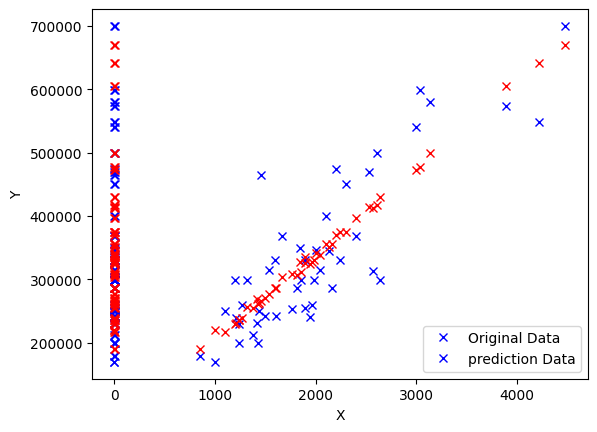

In [24]:
### evaluate the model
import matplotlib.pyplot as plt
# calculate the predicted scores
prediction = X @ beta ### Your code here
# calculate the sum of square error
error = sse(prediction, Y)
ave_error=error/len(Y)
print('Sum of average error: %f' %ave_error)
print('Sum of square error: %f' %error)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X,Y,'bx',X,prediction,'rx')
plt.legend(('Original Data', 'prediction Data'), loc='lower right')
plt.show()

In [19]:
### Extra step
# generate synthetic scores
Ys = 3 * X[:,0] + 2 * X[:,1] + 0.5 * X[:,2] # generate Ys using a linear function of the features of X
# perform multivariate linear regression with X and Ys as inputs
beta_2 = pseudo_inverse(X) @ Ys ### Your code here
print('beta_2: ', beta_2)
# calculate the predicted scores
prediction_2 =  X @ beta_2### Your code here
# calculate the sum of square error
error_2 = sse(prediction_2, Ys)
print('Sum of square error: %f' %error_2)

beta_2:  [3.  2.  0.5]
Sum of square error: 0.000000
